# Fashion Cloth Classification with Keras

In [1]:
# Loading necessary packages

import numpy
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
df_train = pd.read_csv("./data/fashion-mnist_train.csv", header=None)
X_train = df_train.iloc[:,1:].as_matrix()
X_train = X_train.reshape(X_train.shape[0], 28, 28).astype('float32')
y_train = df_train[0]
X_train.shape

(60000, 28, 28)

In [8]:
df_test = pd.read_csv("./data/fashion-mnist_test.csv", header=None)
X_test = df_test.iloc[:4000,1:].as_matrix()
X_test = X_test.reshape(X_test.shape[0], 28, 28).astype('float32')
y_test = df_test.iloc[:4000, 0].as_matrix()

In [9]:
X_test.shape

(4000, 28, 28)

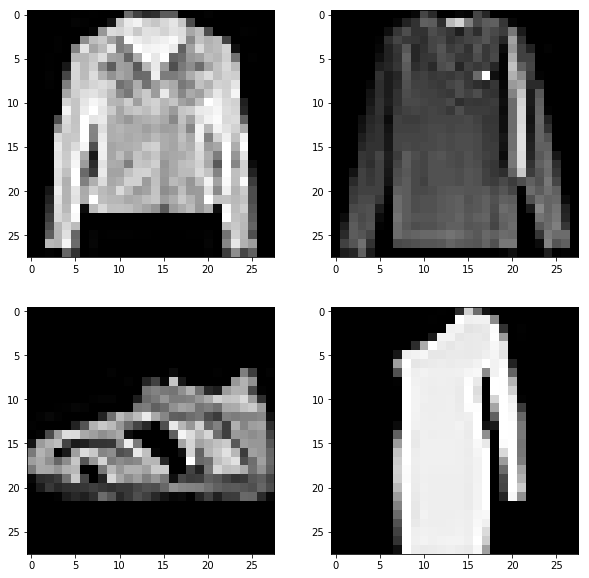

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(X_train[23], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[78], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[45], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[34], cmap=plt.get_cmap('gray'))
plt.show()

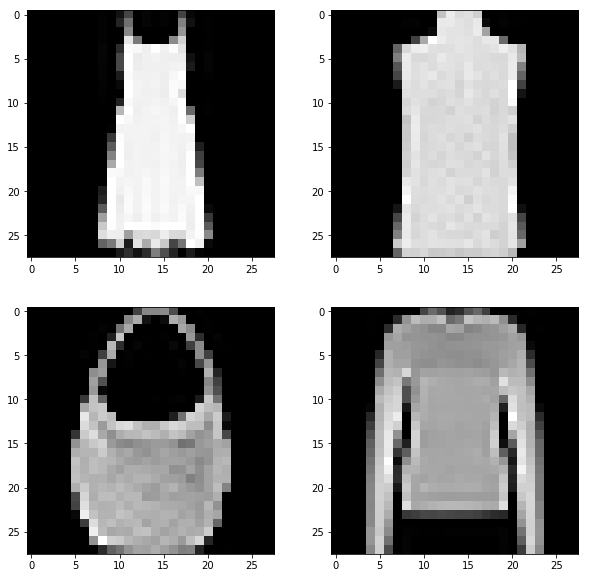

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(X_test[266], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[3000], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2000], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3456], cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [14]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [15]:
num_classes = 10

In [16]:
# define a simple CNN model
def cnn_model():
    
    # create model
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [17]:
# build the model
cnn_model = cnn_model()

In [20]:
# Fit the model
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 4000 samples
Epoch 1/10
60000/60000 [==============================] - 179s - loss: 0.3450 - acc: 0.8780 - val_loss: 0.3165 - val_acc: 0.8858
Epoch 2/10
60000/60000 [==============================] - 179s - loss: 0.3026 - acc: 0.8924 - val_loss: 0.2859 - val_acc: 0.8940
Epoch 3/10
60000/60000 [==============================] - 180s - loss: 0.2770 - acc: 0.8994 - val_loss: 0.2680 - val_acc: 0.9002
Epoch 4/10
60000/60000 [==============================] - 184s - loss: 0.2565 - acc: 0.9068 - val_loss: 0.2785 - val_acc: 0.8955
Epoch 5/10
60000/60000 [==============================] - 196s - loss: 0.2408 - acc: 0.9117 - val_loss: 0.2647 - val_acc: 0.9000
Epoch 6/10
60000/60000 [==============================] - 181s - loss: 0.2289 - acc: 0.9164 - val_loss: 0.2364 - val_acc: 0.9082
Epoch 7/10
60000/60000 [==============================] - 175s - loss: 0.2160 - acc: 0.9195 - val_loss: 0.2547 - val_acc: 0.9020
Epoch 8/10
60000/60000 [========================

In [21]:
# Final evaluation of the model
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: {:.2f}%".format(cnn_scores[1]*100))
print("CNN Error: {:.2f}%".format(100-cnn_scores[1]*100))

CNN Accuracy: 91.57%
CNN Error: 8.43%
